## Ocean stratification

### loading the modules

In [1]:
%reload_ext autoreload
%autoreload 2

In [5]:
from aqua.diagnostics.ocean_stratification import Stratification
from aqua.diagnostics.ocean_stratification import PlotStratification


### Initalizing the function and process data 

####  Model

In [16]:
strat_model = Stratification(catalog='mn5-phase2', model='IFS-NEMO', exp='control-1990-freeze', source='lra-r100-monthly',
                startdate="01-01-1990", enddate="31-12-1990",
          loglevel='WARNING')

strat_model.run(
    # dim_mean=["lat","lon"],
    outputdir= ".",
    var=['thetao', 'so'],
    region="ls",
    mld = True,  # Set to True to compute MLD, False to skip MLD computation
    climatology = "January"
    )

2025-10-01 20:05:13 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-10-01 20:05:13 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data


####  Observation

In [ ]:
strat_obs = Stratification(catalog='obs', model='EN4', exp='en4', source='monthly',
                startdate="01-01-1990", enddate="31-12-1990",
          loglevel='WARNING')
strat_obs.run(
    # dim_mean=["lat","lon"],
    outputdir= ".",
    var=['thetao', 'so'],
    region="ls",
    mld = True,  # Set to True to compute MLD, False to skip MLD computation
    climatology = "January"
    )####  model

### Plotting the data

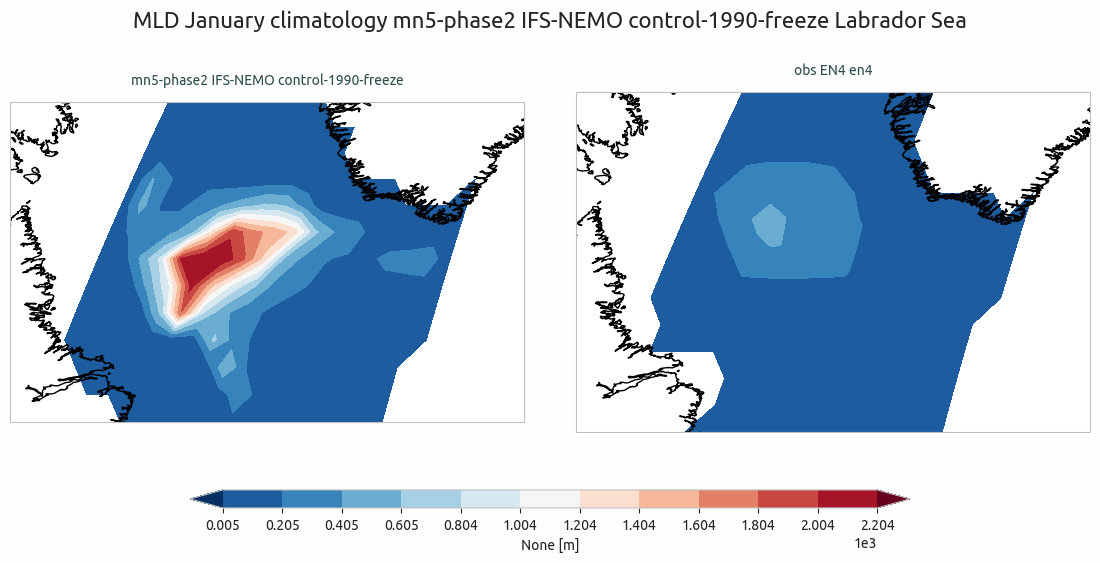

In [18]:
ps = PlotStratification(data=strat_model.data[["mld"]],
                        obs=strat_obs.data[["mld"]],
                        # clim_time="January"
                        )
ps.plot_mld() 